                                                                                                        ### Olive KMG

# Project - WeRateDogs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json 
import os
import io
import time
import re
import tweepy


## Gather
from CSV
from website
from Twitter using API

In [2]:
#### Gathering data source 1
#Read CSV file into DataFrame
twitter_archive_df = pd.read_csv('twitter-archive.csv')
twitter_archive_df.head(2)  

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
#### Gathering data source 2 
#Programmatically download image_predictions.tsv to a folder called image_predictions using the Requests library.

In [4]:
# Make directory if it doesn't already exist
import requests
import os

folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
urls_Data = requests.get(url).content
image_df = pd.read_table(io.StringIO(urls_Data.decode('utf-8')))
image_df.head(2)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


#### Gathering data source 3
#Additional data -> 'tweet_json.txt'  -> df
#info - for accessing API

consumer_key = '*'
consumer_secret = '*'
access_token = '*' 
access_token_secret = '*' 
 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)


tweet_id_ = list(twitter_archive_df['tweet_id'])

processed =[]
not_processed = []
with open('tweet_json.txt', 'w') as file:
      for tweet_id in tweet_id_:
        try:
            tweet_details = api.get_status(tweet_id,tweet_mode='extended')
            json.dump(tweet_details._json, file)
            file.write('\n')
            processed.append(tweet_id)
        except Exception as e:
            print(tweet_id,e)
            not_processed.append(tweet_id)
  

In [5]:
tweet_df = pd.read_json('tweet_json.txt', lines = True,encoding='utf-8')
tweet_df.head(2)


,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38151,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8347,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32715,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6170,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assessment 
- twitter_archive table
- image_predictions table
- tweet_json table
 

#### 1.  Visual Assessment 
#'twitter-archive' table - with excel
    
#'image_predictions' table - with notepad++  
 
#'tweet_json' table - with notepad++

#### Issues Found (Quality and Tidiness)
(accuracy, validity, consistency, completeness)

#### Visual Assessment
#'twitter-archive' table
 - date, month and year variables all in one column as timestamp
 - two empty columns - 'in_reply_to_status_id', 'in_reply_to_user_id
 - rating variable in two columns instead of one
 - Dog stage variable in four columns instead of one
    
#### Visual Assessment
#'image_predictions' table
 - predictions p1, p2, p3 in three different columns
    
#### Visual Assessment
#'tweet_json' table
 - day, month, date, time in one column

###  Programmatic Assessment

In [6]:
twitter_archive_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [7]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
image_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [11]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [13]:
tweet_df.head(2)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38151,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8347,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32715,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6170,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [14]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2341
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
display_text_range               2342 non-null object
entities                         2342 non-null object
extended_entities                2068 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null bool
full_text                        2342 non-null object
geo                              0 non-null float64
id                               2342 non-null int64
id_str                           2342 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [15]:
tweet_df.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2342.000000,0.0,2.342000e+03,2.342000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2206.0,2206.0,2.600000e+01,2.600000e+01,2342.000000
mean,NaN,NaN,7985.254056,NaN,7.422212e+17,7.422212e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.0,0.0,8.113972e+17,8.113972e+17,2944.053800
std,NaN,NaN,12360.793409,NaN,6.832408e+16,6.832408e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.0,0.0,6.295843e+16,6.295843e+16,4951.135636
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1377.500000,NaN,6.783509e+17,6.783509e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.0,0.0,7.761338e+17,7.761338e+17,591.500000
50%,NaN,NaN,3474.500000,NaN,7.186224e+17,7.186224e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.281173e+17,8.281173e+17,1374.500000
75%,NaN,NaN,9781.500000,NaN,7.986971e+17,7.986971e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.637581e+17,8.637581e+17,3432.750000
max,NaN,NaN,164671.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,83915.000000


In [16]:
twitter_archive_df.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
306,836001077879255040,NaN,NaN,2017-02-26 23:52:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas is back and this time he's prettier than...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836001077...,13,10,None,None,None,None,None
1952,673680198160809984,NaN,NaN,2015-12-07 01:47:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shnuggles. I would kill for Shnuggles....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673680198...,13,10,Shnuggles,None,None,None,None


In [17]:
twitter_archive_df['name'].value_counts().sample(5)

Darby     1
Davey     2
Alice     2
Alfy      1
Apollo    1
Name: name, dtype: int64

In [18]:
# different lengths
len(twitter_archive_df) , len(image_df), len(tweet_df)

(2356, 2075, 2342)

In [19]:
# Number of tweet_id duplicates
all_columns = pd.Series(list(twitter_archive_df) + list(image_df) + list(tweet_df))
all_columns[all_columns.duplicated()]

17                 tweet_id
42    in_reply_to_status_id
44      in_reply_to_user_id
58                   source
dtype: object

In [20]:
twitter_archive_df[twitter_archive_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Issues Found (Quality and Tidiness)

#### Quality
#'twitter-archive' table
 - empty columns - 'in_reply_to_status_id', 'in_reply_to_user_id
 - rating columns  must be a float integer
 - tweet_id and all other ids as integer instead of object
 - incomplete rows and NaNs in 'in_reply_to_status_id', 'in_reply_to_user_id', retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' and 'expanded_urls'
 - timestamp  and retweeted_status_timestamp dtype as object instead of datetime
 - The name column has many invalid values like the, a, an, None
 
#'image' table
 - tweet_id integer instead of object
 - none descriptive column names eg img_num, p1_conf, p2_conf,p3_conf

#'tweet' table
 - tweet_id column is  'id' instead of 'tweet_id'
 - NaNs in 'contributors', 'coordinates', 'geo', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink'


#### Tidy
####3 data tables

#'twitter-archive' table
- date, month and year variables all in one column as timestamp
- rating variable in two columns instead of one
- dog stages doggo,	floofer, pupper, puppo must be one variable
    
#'image' table    
- predictions p1, p2, p3 in three different columns instead of 1
    
#'tweet' table
 - date, month, year and time variables all in one column as 'created_at' 
 

## Cleaning
- 8 quality issues and two (2) tidiness issues to be addressed

In [21]:
# make copies
twitter_ach_clean = twitter_archive_df.copy()
image_clean = image_df.copy()
tweet_clean = tweet_df.copy()


#### Define
Drop empty or columns with  NaN values in twitter_clean and tweet_clean using pandas .drop() method.

In [22]:
#code
# drop non useful columns
tweet_clean = tweet_clean.drop(['contributors','coordinates','entities', 'favorited','geo', 'id_str', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweeted', 'retweeted_status', 'source', 'truncated', 'extended_entities', 'user', 'display_text_range'], axis = 1)
tweet_clean = tweet_clean.drop(['in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str','place', 'is_quote_status', 'lang', 'possibly_sensitive', 'possibly_sensitive_appealable','quoted_status_permalink'], axis = 1)

In [23]:
#code
twitter_clean = twitter_ach_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_timestamp', 'retweeted_status_id', 'retweeted_status_user_id', 'source', 'expanded_urls'], axis = 1)

In [24]:
#### Test
twitter_clean.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1249,711306686208872448,2016-03-19 21:41:44 +0000,What hooligan sent in pictures w/out a dog in ...,3,10,None,None,None,None,None
209,852226086759018497,2017-04-12 18:25:07 +0000,Meet General. He wasn't content with the quali...,14,10,General,None,None,None,None
1472,693942351086120961,2016-01-31 23:42:03 +0000,This is Kobe. He's a Speckled Rorschach. Reque...,10,10,Kobe,None,None,None,None
1681,681981167097122816,2015-12-29 23:32:35 +0000,This is Jimothy. He's a Trinidad Poliwhirl. Fa...,12,10,Jimothy,None,None,None,None
1531,690015576308211712,2016-01-21 03:38:27 +0000,This pupper can only sleep on shoes. It's a cr...,12,10,None,None,None,pupper,None
849,766008592277377025,2016-08-17 20:27:34 +0000,This is Angel. She stole the @ShopWeRateDogs s...,11,10,Angel,None,None,None,None
2259,667550904950915073,2015-11-20 03:51:52 +0000,RT @dogratingrating: Exceptional talent. Origi...,12,10,None,None,None,None,None
833,768554158521745409,2016-08-24 21:02:45 +0000,RT @dog_rates: This is Nollie. She's waving at...,12,10,Nollie,None,None,None,None
885,760153949710192640,2016-08-01 16:43:19 +0000,RT @hownottodraw: The story/person behind @dog...,11,10,None,None,None,None,None
1412,698953797952008193,2016-02-14 19:35:46 +0000,Meet CeCe. She wanted to take a selfie before ...,11,10,CeCe,None,None,None,None


In [25]:
#Test  
tweet_clean.sample(5)

,created_at,favorite_count,full_text,id,retweet_count
2042,2015-11-30 15:59:17,406,Tfw she says hello from the other side. 9/10 h...,671357843010908160,151
1923,2015-12-07 17:38:09,1194,This is Obie. He is on guard watching for evil...,673919437611909120,383
1054,2016-06-08 02:41:38,36551,"After so many requests, this is Bretagne. She ...",740373189193256964,14241
2003,2015-12-02 21:06:56,885,This is Bubba. He's a Titted Peebles Aorta. Ev...,672160042234327040,369
2337,2015-11-16 00:24:50,108,Here we have a 1949 1st generation vulpix. Enj...,666049248165822465,41


#### Define
change 'id' in tweet_clean  to 'tweet_id' 

In [26]:
#code
tweet_clean = tweet_clean.rename(columns ={'id': 'tweet_id'})

In [27]:
# test
tweet_clean.head(1)

,created_at,favorite_count,full_text,tweet_id,retweet_count
0,2017-08-01 16:23:56,38151,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,8347


#### Define
Tidy issue - combine the 3 dfs together - on 'tweet_id'

#### Code

In [28]:
# to merge the 3 dfs together
from functools import reduce
dfs = [twitter_clean, image_clean, tweet_clean]
df_final = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)


#### Test

In [29]:
df_final.sample(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,favorite_count,full_text,retweet_count
1786,671122204919246848,2015-11-30 00:22:57 +0000,Two miniature golden retrievers here. Webbed p...,4,10,None,None,None,None,None,...,Chihuahua,0.101228,True,hen,0.065818,False,2015-11-30 00:22:57,3567,Two miniature golden retrievers here. Webbed p...,2598
1304,688908934925697024,2016-01-18 02:21:04 +0000,Meet Clarence. He does parkour. 8/10 very tale...,8,10,Clarence,None,None,None,None,...,pier,0.130016,False,bell_cote,0.087741,False,2016-01-18 02:21:04,2227,Meet Clarence. He does parkour. 8/10 very tale...,826
966,720785406564900865,2016-04-15 01:26:47 +0000,This is Archie. He hears everything you say. D...,12,10,Archie,None,None,None,None,...,dingo,0.027929,False,kelpie,0.017916,True,2016-04-15 01:26:47,3255,This is Archie. He hears everything you say. D...,820


In [30]:
# to re-assess status after merge
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2067
Data columns (total 25 columns):
tweet_id              2068 non-null int64
timestamp             2068 non-null object
text                  2068 non-null object
rating_numerator      2068 non-null int64
rating_denominator    2068 non-null int64
name                  2068 non-null object
doggo                 2068 non-null object
floofer               2068 non-null object
pupper                2068 non-null object
puppo                 2068 non-null object
jpg_url               2068 non-null object
img_num               2068 non-null int64
p1                    2068 non-null object
p1_conf               2068 non-null float64
p1_dog                2068 non-null bool
p2                    2068 non-null object
p2_conf               2068 non-null float64
p2_dog                2068 non-null bool
p3                    2068 non-null object
p3_conf               2068 non-null float64
p3_dog                2068 non-null bo

#### Define
Change the'timestamp' from int object to string slice off the time element to standardise and then change it to a timedate object

In [31]:
# current status 
df_final.timestamp.head(5)

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

#### code

In [32]:
df_final['tweet_id'] = df_final['tweet_id'].astype(object)
df_final['timestamp'] = pd.to_datetime(df_final.timestamp).astype(str).str[:-9]

#### Test

In [33]:
print('tweet_id', df_final.dtypes.tweet_id) 
print('timestamp', df_final.dtypes.timestamp)

tweet_id object
timestamp object


In [34]:
df_final.timestamp.sample(5)

249     2017-02-22
1938    2015-11-22
8       2017-07-27
1918    2015-11-23
256     2017-02-20
Name: timestamp, dtype: object

In [35]:
df_final.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,2068.000000,2068.000000,2068.000000,2068.000000,2.068000e+03,2.068000e+03,2068.000000,2068.000000
mean,12.263056,10.513056,1.203578,0.594944,1.345462e-01,6.028703e-02,8439.850580,2814.643133
std,40.749075,7.189152,0.562191,0.271201,1.007553e-01,5.094828e-02,12703.546408,4892.323906
min,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,12.000000
25%,10.000000,10.000000,1.000000,0.364571,5.352722e-02,1.616933e-02,1604.250000,598.500000
50%,11.000000,10.000000,1.000000,0.588620,1.181350e-01,4.933745e-02,3713.500000,1324.500000
75%,12.000000,10.000000,1.000000,0.845599,1.955618e-01,9.198323e-02,10569.000000,3248.750000
max,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,164671.000000,83915.000000


#### Define
Reduce  number of columns. 
Drop columns text, imag_num, created_at('created_at' is same as timestamp)
Rename some columns 

In [36]:
#### code
df_final = df_final.rename(columns = {'rating_numerator':'numerator', 'rating_denominator':'denominator'})
df_final = df_final.drop(['text', 'img_num', 'created_at'], axis = 1 )

In [37]:
#### Test
df_final.sample(3)

,tweet_id,timestamp,numerator,denominator,name,doggo,floofer,pupper,puppo,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,full_text,retweet_count
505,793601777308463104,2016-11-01,12,10,Dobby,None,None,None,None,https://pbs.twimg.com/media/CwNwmxvXEAEJ54Z.jpg,...,True,Chihuahua,0.217830,True,toy_terrier,0.089149,True,8565,This is Dobby. I can't stop looking at her fee...,1805
367,817171292965273600,2017-01-06,13,10,Tebow,None,None,None,None,https://pbs.twimg.com/media/C1cs8uAWgAEwbXc.jpg,...,True,Irish_setter,0.144431,True,Chesapeake_Bay_retriever,0.077879,True,9314,This is Tebow. He kindly requests that you put...,2202
1185,698710712454139905,2016-02-14,10,10,Cuddles,None,None,None,None,https://pbs.twimg.com/media/CbJRrigW0AIcJ2N.jpg,...,True,shoji,0.165772,False,prison,0.103596,False,2602,This is Cuddles. He's not entirely sure how do...,728


#### Define
Melt or combine the dog stage columns into one column

In [38]:
# Check the values in columns to melt
print(df_final.doggo.value_counts())
print(df_final.floofer.value_counts())
print(df_final.pupper.value_counts())
print(df_final.puppo.value_counts())

None     1988
doggo      80
Name: doggo, dtype: int64
None       2060
floofer       8
Name: floofer, dtype: int64
None      1846
pupper     222
Name: pupper, dtype: int64
None     2044
puppo      24
Name: puppo, dtype: int64


#### code

In [39]:
# columns to melt and to remain
column_melt = ['doggo', 'floofer', 'pupper', 'puppo']
column_stay = [x for x in df_final.columns.tolist() if x not in column_melt]

# melt columns into values
df_final = pd.melt(df_final, id_vars = column_stay, value_vars = column_melt, 
                         var_name = 'stage', value_name = 'dog_stage')

# Delete column 'stages'
df_final = df_final.drop('stage', 1)

# Filter for unique values, remove duplicate values based on 'dog_stage' values

# testing
print(df_final.dog_stage.value_counts())

df_final = df_final.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')



None       7938
pupper      222
doggo        80
puppo        24
floofer       8
Name: dog_stage, dtype: int64


In [40]:
#### test
print(df_final.dog_stage.value_counts())
print(len(df_final))


None       1747
pupper      222
doggo        67
puppo        24
floofer       8
Name: dog_stage, dtype: int64
2068


In [41]:
### store true values with  corresponding level of confidence
prediction = []
confidence_level = []

# Get_prediction_confidence function:
# search for first value, append to list with level of confidence
# if false predictiongets a value of NaN

def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    else:
        prediction.append('NaN')
        confidence_level.append(0)

df_final.apply(get_prediction_confidence, axis=1)
df_final['prediction'] = prediction
df_final['confidence_level'] = confidence_level

# Test
list(df_final)

['tweet_id',
 'timestamp',
 'numerator',
 'denominator',
 'name',
 'jpg_url',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorite_count',
 'full_text',
 'retweet_count',
 'dog_stage',
 'prediction',
 'confidence_level']

#### Define
Drop non useful columns

In [42]:
# code 
df_final = df_final.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

# Test
list(df_final)

['tweet_id',
 'timestamp',
 'numerator',
 'denominator',
 'name',
 'jpg_url',
 'favorite_count',
 'full_text',
 'retweet_count',
 'dog_stage',
 'prediction',
 'confidence_level']

In [43]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 1991 to 6791
Data columns (total 12 columns):
tweet_id            2068 non-null object
timestamp           2068 non-null object
numerator           2068 non-null int64
denominator         2068 non-null int64
name                2068 non-null object
jpg_url             2068 non-null object
favorite_count      2068 non-null int64
full_text           2068 non-null object
retweet_count       2068 non-null int64
dog_stage           2068 non-null object
prediction          2068 non-null object
confidence_level    2068 non-null float64
dtypes: float64(1), int64(4), object(7)
memory usage: 210.0+ KB


#### Define
add new rating column  

In [44]:
#code
rating = (df_final['numerator'] / df_final['denominator'])
df_final['rating'] = rating

In [45]:
#test
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 1991 to 6791
Data columns (total 13 columns):
tweet_id            2068 non-null object
timestamp           2068 non-null object
numerator           2068 non-null int64
denominator         2068 non-null int64
name                2068 non-null object
jpg_url             2068 non-null object
favorite_count      2068 non-null int64
full_text           2068 non-null object
retweet_count       2068 non-null int64
dog_stage           2068 non-null object
prediction          2068 non-null object
confidence_level    2068 non-null float64
rating              2068 non-null float64
dtypes: float64(2), int64(4), object(7)
memory usage: 226.2+ KB


#### Define 
Correct name column
fill the name columns using text content
examples cases

    This is [name] ..
    Meet [name] ..
    Say hallo to [name] ..
    Here we have [name] ..
    RT @dog_rates: This is [name] ..
    .. named [name] ..

using these cases, get names from the text of the tweet

In [46]:
# Loop through the full_texts for any of the conditions stipulated above
# and append result to a list
dog_names = []

for full_text in df_final['full_text']:
    # Start with 'This is ' first letter of name is uppercase
    if full_text.startswith('This is ') and re.match(r'[A-Z].*', full_text.split()[2]):
        dog_names.append(full_text.split()[2].strip(',').strip('.'))
    # Start with 'Meet ' and the first letter of name is uppercase
    elif full_text.startswith('Meet ') and re.match(r'[A-Z].*', full_text.split()[1]):
        dog_names.append(full_text.split()[1].strip(',').strip('.'))
    # Start with 'Say hello to ' and the first letter of name is uppercase
    elif full_text.startswith('Say hello to ') and re.match(r'[A-Z].*', full_text.split()[3]):
        dog_names.append(full_text.split()[3].strip(',').strip('.'))
    # Start with 'Here we have ' and the first letter of the name is uppercase
    elif full_text.startswith('Here we have ') and re.match(r'[A-Z].*', full_text.split()[3]):
        dog_names.append(full_text.split()[3].strip(',').strip('.'))
    # Contain 'named' and the first letter of the name is uppercase
    elif 'named' in full_text and re.match(r'[A-Z].*', full_text.split()[full_text.split().index('named') + 1]):
        dog_names.append(full_text.split()[full_text.split().index('named') + 1].strip(',').strip('.'))
    # Start with 'RT @dog_rates: This is' and the first letter of the name is uppercase
    elif full_text.startswith('RT @dog_rates: This is ') and re.match(r'[A-Z].*', full_text.split()[4]):
        dog_names.append(full_text.split()[4].strip(',').strip('.'))
    # No name specified or other style
    else:
        dog_names.append('NaN')

# Test
len(dog_names)

# Save the result in a new column 'dog_name'
df_final['dog_name'] = dog_names

In [47]:
# Test
# results would be better with 'text' - which was dropped earlier than with 'full_text'
print("New column dog_name count \n", df_final.dog_name.value_counts())
print("Old column name count \n", df_final.name.value_counts())

New column dog_name count 
 NaN             656
Lucy             10
Tucker           10
Penny            10
Oliver           10
Charlie          10
Cooper           10
Sadie             8
Winston           8
Lola              8
Bo                8
Daisy             7
Jax               6
Milo              6
Koda              6
Toby              6
Bella             6
Bailey            6
Stanley           6
Rusty             6
Scout             6
Buddy             5
Dave              5
Leo               5
Chester           5
Alfie             5
Larry             5
Louis             5
Oscar             5
Phil              4
               ... 
Kevon             1
Kyro              1
Tess              1
Nida              1
Glacier           1
Bertson           1
Kody              1
Maxwell           1
Pip               1
Chesney           1
Sparky            1
Amélie            1
Bungalo           1
Leroi             1
Emmie             1
Schnozz           1
Rodman            1
Cleopatricia

#### Define
Correct the timestamp data type
Convert the null values to None type

In [48]:
# code
df_final['timestamp'] = pd.to_datetime(df_final.timestamp)
df_final.loc[df_final['prediction'] == 'NaN', 'prediction'] = None
df_final.loc[df_final['dog_name'] == 'NaN', 'dog_name'] = None

In [53]:
#### Test
df_final.sample(3)

,tweet_id,timestamp,numerator,denominator,name,jpg_url,favorite_count,full_text,retweet_count,dog_stage,prediction,confidence_level,rating,dog_name
2943,739979191639244800,2016-06-07,12,10,Nollie,https://pbs.twimg.com/media/CkTvJTdXAAAEfbT.jpg,20976,This is Nollie. She's waving at you. If you do...,6339,None,Irish_water_spaniel,0.285800,1.2,Nollie
3606,676811746707918848,2015-12-15,9,10,Penny,https://pbs.twimg.com/media/CWSEsO9WwAAX-fZ.jpg,1469,Say hello to Penny &amp; Gizmo. They are pract...,447,None,Chihuahua,0.440916,0.9,Penny
3510,680798457301471234,2015-12-26,6,10,Moofasa,https://pbs.twimg.com/media/CXKuiyHUEAAMAGa.jpg,2998,Say hello to Moofasa. He must be a powerful do...,1120,None,None,0.000000,0.6,Moofasa


#### Define
Create a year column from timestamp

In [55]:
#code
year = df_final.timestamp.dt.year
df_final['year'] = year
df_final.head(2)

,tweet_id,timestamp,numerator,denominator,name,jpg_url,favorite_count,full_text,retweet_count,dog_stage,prediction,confidence_level,rating,dog_name,year
1991,667435689202614272,2015-11-19,12,10,None,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,308,Ermergerd 12/10 https://t.co/PQni2sjPsm,84,None,Rottweiler,0.999091,1.2,None,2015
1990,667437278097252352,2015-11-19,10,10,None,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,453,Never seen this breed before. Very pointy pup....,242,None,None,0.000000,1.0,None,2015


#### test

In [57]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 1991 to 6791
Data columns (total 15 columns):
tweet_id            2068 non-null object
timestamp           2068 non-null datetime64[ns]
numerator           2068 non-null int64
denominator         2068 non-null int64
name                2068 non-null object
jpg_url             2068 non-null object
favorite_count      2068 non-null int64
full_text           2068 non-null object
retweet_count       2068 non-null int64
dog_stage           2068 non-null object
prediction          1745 non-null object
confidence_level    2068 non-null float64
rating              2068 non-null float64
dog_name            1412 non-null object
year                2068 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(7)
memory usage: 258.5+ KB


#### Storing

In [58]:
#saved
df_final.to_csv('twitter_archive_master.csv', encoding = 'utf-8') 

## Analysis
could there be some relation between rating, retweets, and favorites?

In [61]:
df_final.describe()

,numerator,denominator,favorite_count,retweet_count,confidence_level,rating,year
count,2068.000000,2068.000000,2068.000000,2068.000000,2068.000000,2068.000000,2068.000000
mean,12.263056,10.513056,8439.850580,2814.643133,0.463492,1.169576,2015.863153
std,40.749075,7.189152,12703.546408,4892.323906,0.339271,3.993692,0.698423
min,0.000000,2.000000,0.000000,12.000000,0.000000,0.000000,2015.000000
25%,10.000000,10.000000,1604.250000,598.500000,0.140107,1.000000,2015.000000
50%,11.000000,10.000000,3713.500000,1324.500000,0.457101,1.100000,2016.000000
75%,12.000000,10.000000,10569.000000,3248.750000,0.772954,1.200000,2016.000000
max,1776.000000,170.000000,164671.000000,83915.000000,0.999956,177.600000,2017.000000


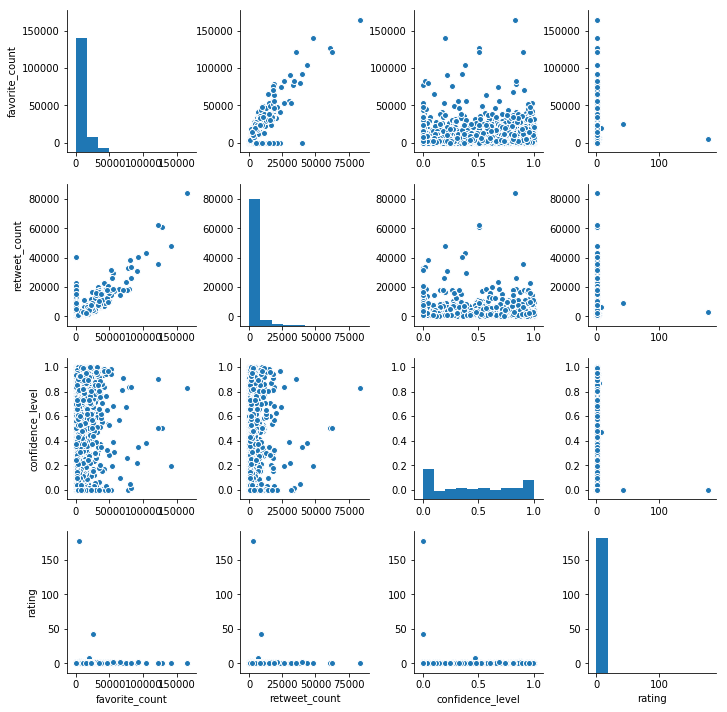

In [65]:
#Could there be some relation btween favorite count, retweet and rating?
#Create the default pairplot
df_num = df_final[['favorite_count', 'retweet_count', 'confidence_level', 'rating']]
sns.pairplot(df_num)


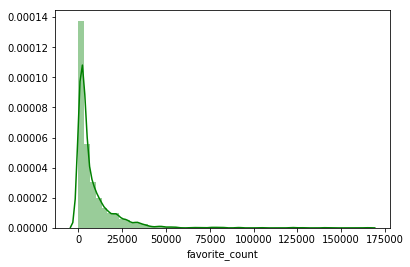

In [70]:
# code for density plot of favourite count
sns.distplot(df_final.favorite_count, color = 'green', label = 'Favorite_count')
plt.show()

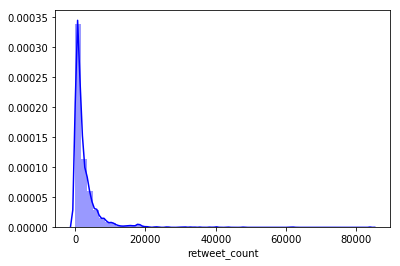

In [75]:
# code for density plot of favourite count
sns.distplot(df_final.retweet_count, color = 'blue', label = 'retweet_count')
plt.show()

In [ ]:
# both distribution plots have a sharp peak about zero - therefore rare and both distributions have
a long tail to the right

In [87]:
df_final.sort_values(by = 'prediction', ascending = False).head()
#prediction_values do not have the actual dog names...like zebra!
#wondering how the P1 level at 0.997 confidence level call a dog zebra- unless its not the literal meaning

,tweet_id,timestamp,numerator,denominator,name,jpg_url,favorite_count,full_text,retweet_count,dog_stage,prediction,confidence_level,rating,dog_name,year
2870,749317047558017024,2016-07-02,12,10,Blu,https://pbs.twimg.com/ext_tw_video_thumb/74931...,5798,This is Blu. He's a wild bush Floofer. I wish ...,2390,floofer,wire-haired_fox_terrier,0.155144,1.2,Blu,2016
2579,793226087023144960,2016-10-31,11,10,Juno,https://pbs.twimg.com/media/CwIa5CjW8AErZgL.jpg,10584,"This is Juno. She spooked me up real good, but...",3154,None,wire-haired_fox_terrier,0.456047,1.1,Juno,2016
5679,676603393314578432,2015-12-15,9,10,Godzilla,https://pbs.twimg.com/media/CWPHMqKVAAAE78E.jpg,1214,This is Godzilla pupper. He had a ruff childho...,411,pupper,whippet,0.877021,0.9,Godzilla,2015
2829,753398408988139520,2016-07-14,12,10,Scout,https://pbs.twimg.com/ext_tw_video_thumb/75339...,6127,This is Scout. Her batteries are low. 12/10 pr...,2077,None,whippet,0.163794,1.2,Scout,2016
267,832032802820481025,2017-02-16,12,10,Miguel,https://pbs.twimg.com/media/C4v5a4UWcAIRygc.jpg,18819,This is Miguel. He was the only remaining dogg...,5024,doggo,whippet,0.601712,1.2,Miguel,2017


In [94]:
#find the types of dogs predicted
df_types =df_final.groupby('prediction').size()
most_predicted = df_types.sort_values()[-10:]
most_predicted

prediction
malamute               34
Pomeranian             42
Samoyed                46
chow                   51
toy_poodle             52
pug                    65
Chihuahua              93
Pembroke               95
Labrador_retriever    113
golden_retriever      173
dtype: int64

Text(0,0.5,'Prediction')

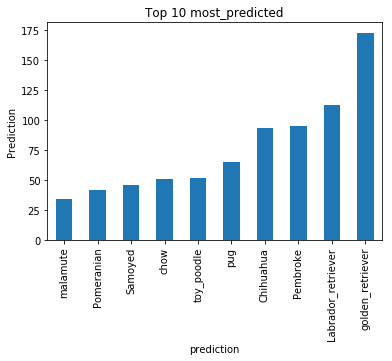

In [95]:
#plot the 10 most predicted dogs
df_types.sort_values()[-10:].plot(kind='bar')
plt.title('Top 10 most_predicted')
plt.ylabel('Prediction')

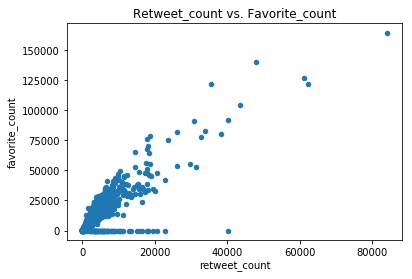

In [96]:
#postive relation only in retweet and favourite pair - expected as shown above!
#correlation Plot - positive relation
df_final.plot(kind='scatter', x = 'retweet_count', y= 'favorite_count')
plt.title("Retweet_count vs. Favorite_count")
plt.show()

In [ ]:
Relation above is strong and positive - expected

In [98]:
dfcorr = df_final[['retweet_count','favorite_count']]
dfcorr.corr(method='pearson')

,retweet_count,favorite_count
retweet_count,1.000000,0.856817
favorite_count,0.856817,1.000000


In [ ]:
-done!-